###  Supervised Learning - Classification Models

In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [14]:
# Load the dataset
heart_df = pd.read_csv("../data/heart.csv") 
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
X = heart_df.drop(['target'] , axis=1)  
y = heart_df['target']

In [17]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [18]:
X.shape , y.shape

((303, 13), (303,))

In [19]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak' ]
scaler = StandardScaler() 
X_trained_scaled = X_train.copy() 
X_test_scaled = X_test.copy()

X_trained_scaled[num_cols] = scaler.fit_transform(X_train[num_cols]) 
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols]) 


### 1- Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , accuracy_score


lg = LogisticRegression()
lg.fit(X_trained_scaled , y_train) 
y_predict = lg.predict(X_test_scaled)


print(classification_report(y_test , y_predict))
print(f"Accuracy: {accuracy_score(y_test, y_predict):.2f}")

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Accuracy: 0.87


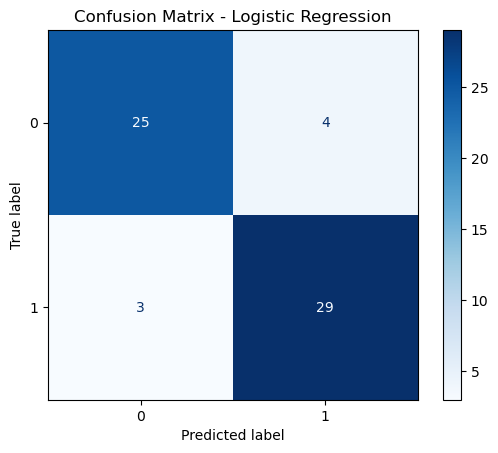

In [32]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

cm = confusion_matrix(y_test , y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lg.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.grid(False)
plt.show()

### 2- Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier 

dt = DecisionTreeClassifier() 
dt.fit(X_trained_scaled , y_train) 
y_predict = dt.predict(X_test_scaled)


print(classification_report(y_test , y_predict))
print(f"Accuracy: {accuracy_score(y_test, y_predict):.2f}")


              precision    recall  f1-score   support

           0       0.77      0.93      0.84        29
           1       0.92      0.75      0.83        32

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61

Accuracy: 0.84


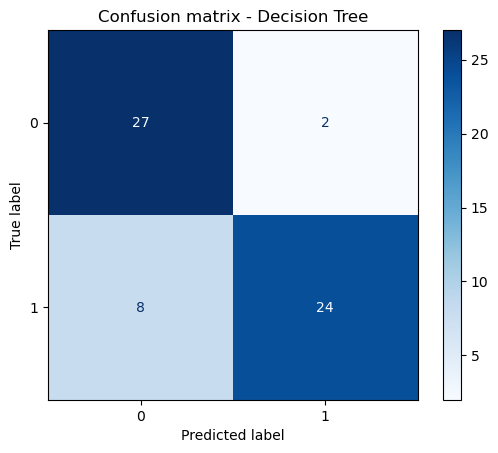

In [35]:
cm_dt = confusion_matrix(y_test , y_predict)

disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt , display_labels=dt.classes_)
disp_dt.plot(cmap='Blues') 
plt.title("Confusion matrix - Decision Tree") 
plt.grid(False) 
plt.show()

### 3- Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier 

rf = RandomForestClassifier()
rf.fit(X_trained_scaled , y_train) 
y_predict = rf.predict(X_test_scaled)


print(classification_report(y_test , y_predict))
print(f"Accuracy: {accuracy_score(y_test, y_predict):.2f}")

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Accuracy: 0.85


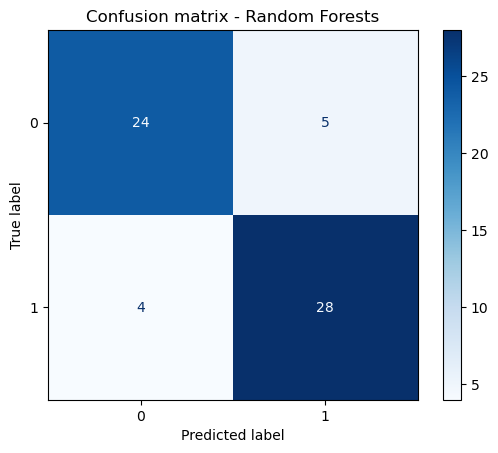

In [46]:
cm_rf = confusion_matrix(y_test , y_predict)

disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf , display_labels=rf.classes_)
disp_rf.plot(cmap='Blues') 
plt.title("Confusion matrix - Random Forests") 
plt.grid(False) 
plt.show()

### 4- Support Vector Machine (SVM)

In [50]:
from sklearn.svm import SVC 

sv = SVC()
sv.fit(X_trained_scaled , y_train) 
y_predict = sv.predict(X_test_scaled)


print(classification_report(y_test , y_predict))
print(f"Accuracy: {accuracy_score(y_test, y_predict):.2f}")

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

Accuracy: 0.89


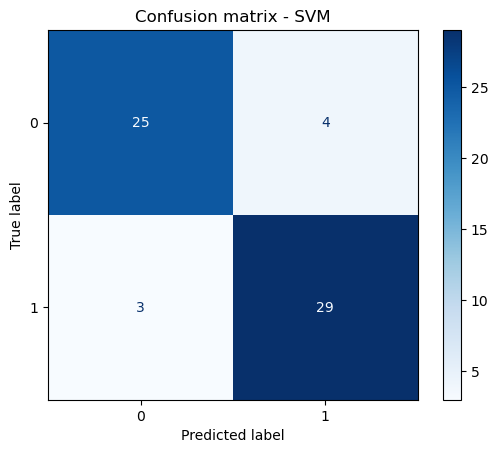

In [51]:
cm_svm = confusion_matrix(y_test , y_predict)

disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm , display_labels=sv.classes_)
disp_svm.plot(cmap='Blues') 
plt.title("Confusion matrix - SVM") 
plt.grid(False) 
plt.show()

✔ Trained models with performance metrics without the hyperparameter tuning